## PART 2

# Problem 2

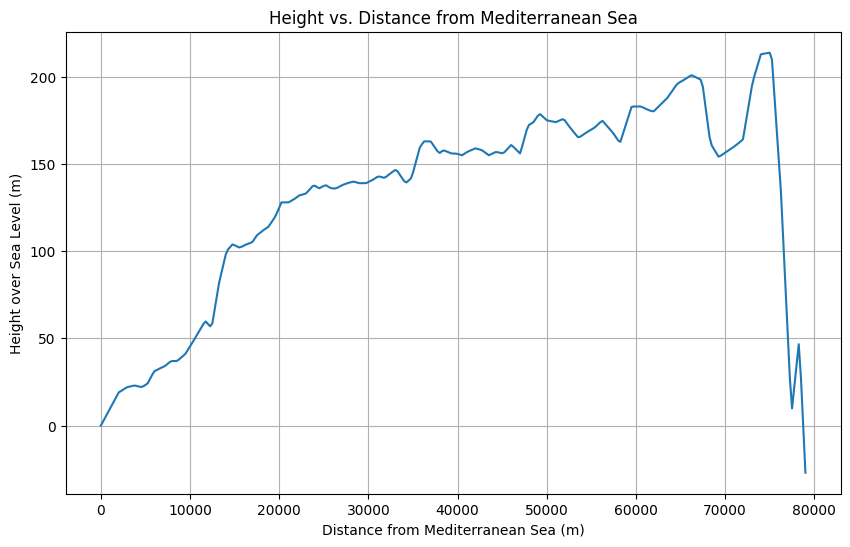

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import csv

def calculate_distance(lat1, lon1, lat2, lon2):
    """Calculates the great-circle distance between two points on the Earth (specified in decimal degrees)."""
    R = 6371000  # Radius of the Earth in meters
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

def interpolate_height(filename, distance_interval=250, output_filename="interpolated_data.csv"):
    """Reads data, calculates distances, interpolates height, plots, and saves to CSV."""

    data = np.loadtxt(filename)
    latitudes = data[:, 0]
    longitudes = data[:, 1]
    heights = data[:, 2]

    distances = [0]
    total_distance = 0

    for i in range(1, len(latitudes)):
        dist = calculate_distance(latitudes[i - 1], longitudes[i - 1], latitudes[i], longitudes[i])
        total_distance += dist
        distances.append(total_distance)

    distances = np.array(distances)

    f = interp1d(distances, heights, kind='linear')
    max_distance = distances[-1]
    interpolated_distances = np.arange(0, max_distance, distance_interval)
    interpolated_heights = f(interpolated_distances)

    # Save to CSV
    with open(output_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Distance (m)", "Height (m)"])  # Header row
        for dist, height in zip(interpolated_distances, interpolated_heights):
            writer.writerow([dist, height])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(interpolated_distances, interpolated_heights)
    plt.xlabel("Distance from Mediterranean Sea (m)")
    plt.ylabel("Height over Sea Level (m)")
    plt.title("Height vs. Distance from Mediterranean Sea")
    plt.grid(True)
    plt.show()

interpolate_height("channel_data.txt", output_filename="interpolated_height.csv") # saves data to interpolated_height.csv


# Problem 3

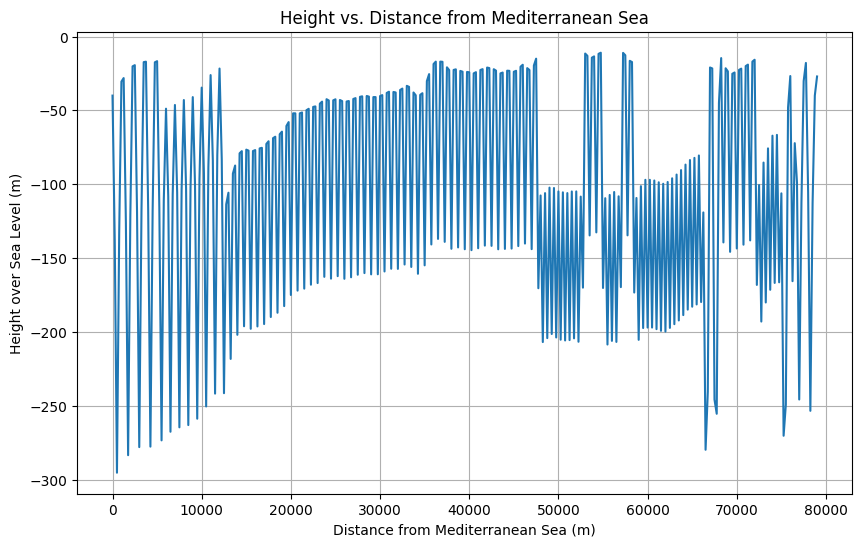

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import csv

x = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
R = [40.0, 140.0, 300.0, 140.0, 40.0, 40.0, 140.0, 300.0, 140.0, 40.0, 40.0, 140.0, 300.0, 140.0, 40.0, 40.0, 140.0, 300.0, 140.0, 40.0, 40.0, 140.0, 300.0, 140.0, 80.0, 140.0, 300.0, 140.0, 80.0, 140.0, 300.0, 140.0, 80.0, 140.0, 300.0, 140.0, 80.0, 140.0, 300.0, 140.0, 80.0, 140.0, 300.0, 140.0, 80.0, 140.0, 300.0, 140.0, 80.0, 140.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 340.00000000000006, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 340.00000000000006, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 340.00000000000006, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 340.00000000000006, 180.0, 180.0, 300.0, 180.0, 180.0, 340.00000000000006, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 320.00000000000006, 480.00000000000006, 440.0, 220.00000000000003, 220.00000000000003, 440.0, 440.0, 220.00000000000003, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 340.00000000000006, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 280.0, 380.0, 320.00000000000006, 480.00000000000006, 440.0, 220.00000000000003, 180.0, 300.0, 180.0, 180.0, 300.0, 140.0, 40.0, 40.0, 140.0, 300.0, 140.0, 40.0, 0.0]


def calculate_distance(lat1, lon1, lat2, lon2):
    """Calculates the great-circle distance between two points on the Earth (specified in decimal degrees)."""
    R = 6371000  # Radius of the Earth in meters
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

def interpolate_height(filename, distance_interval=250, output_filename="interpolated_data.csv"):
    """Reads data, calculates distances, interpolates height, plots, and saves to CSV."""

    data = np.loadtxt(filename)
    latitudes = data[:, 0]
    longitudes = data[:, 1]
    heights = data[:, 2]

    distances = [0]
    total_distance = 0

    for i in range(1, len(latitudes)):
        dist = calculate_distance(latitudes[i - 1], longitudes[i - 1], latitudes[i], longitudes[i])
        total_distance += dist
        distances.append(total_distance)

    distances = np.array(distances)

    f = interp1d(distances, heights, kind='linear')
    max_distance = distances[-1]
    interpolated_distances = np.arange(0, max_distance, distance_interval)
    interpolated_heights = f(interpolated_distances) - R

    # Save to CSV
    with open(output_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Distance (m)", "Height (m)"])  # Header row
        for dist, height in zip(interpolated_distances, interpolated_heights):
            writer.writerow([dist, height])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(interpolated_distances, interpolated_heights)
    plt.xlabel("Distance from Mediterranean Sea (m)")
    plt.ylabel("Height over Sea Level (m)")
    plt.title("Height vs. Distance from Mediterranean Sea")
    plt.grid(True)
    plt.show()

interpolate_height("channel_data.txt", output_filename="interpolated_height.csv")

# Problem 4

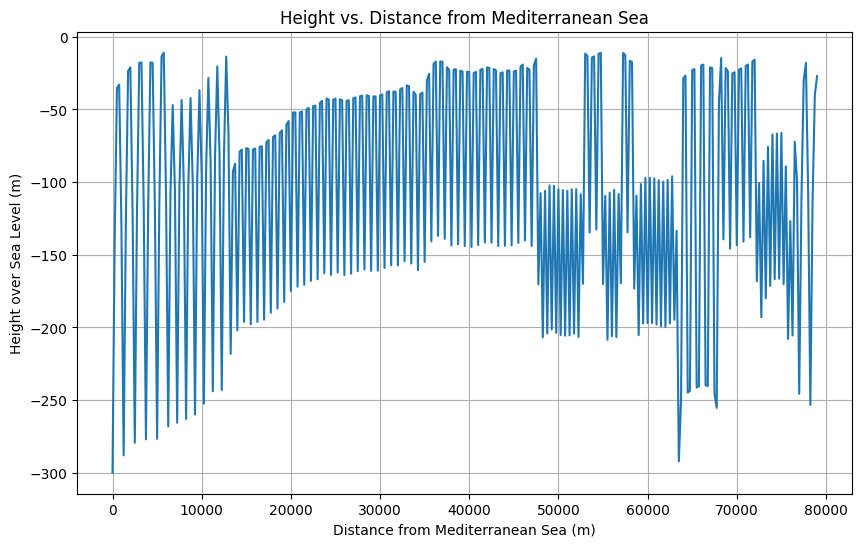

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import csv

x = [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
R = [300.0, 140.00000000000003, 40.00000000000001, 40.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 40.00000000000001, 40.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 40.00000000000001, 40.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 40.00000000000001, 40.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 40.00000000000001, 40.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 340.00000000000006, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 340.00000000000006, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 340.00000000000006, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 340.00000000000006, 180.0, 180.0, 300.0, 180.0, 180.0, 340.00000000000006, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 320.00000000000006, 480.0, 440.0, 220.00000000000003, 220.00000000000003, 440.0, 440.0, 220.00000000000003, 220.00000000000003, 440.0, 440.0, 220.00000000000003, 220.00000000000003, 440.0, 440.0, 220.00000000000003, 220.00000000000003, 440.0, 440.0, 220.00000000000003, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 340.00000000000006, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 380.0, 280.00000000000006, 340.00000000000006, 180.0, 180.0, 300.0, 140.00000000000003, 40.00000000000001, 40.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 40.00000000000001, 0.0]


def calculate_distance(lat1, lon1, lat2, lon2):
    """Calculates the great-circle distance between two points on the Earth (specified in decimal degrees)."""
    R = 6371000  # Radius of the Earth in meters
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

def interpolate_height(filename, distance_interval=250, output_filename="interpolated_data.csv"):
    """Reads data, calculates distances, interpolates height, plots, and saves to CSV."""

    data = np.loadtxt(filename)
    latitudes = data[:, 0]
    longitudes = data[:, 1]
    heights = data[:, 2]

    distances = [0]
    total_distance = 0

    for i in range(1, len(latitudes)):
        dist = calculate_distance(latitudes[i - 1], longitudes[i - 1], latitudes[i], longitudes[i])
        total_distance += dist
        distances.append(total_distance)

    distances = np.array(distances)

    f = interp1d(distances, heights, kind='linear')
    max_distance = distances[-1]
    interpolated_distances = np.arange(0, max_distance, distance_interval)
    interpolated_heights = f(interpolated_distances) - R

    # Save to CSV
    with open(output_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Distance (m)", "Height (m)"])  # Header row
        for dist, height in zip(interpolated_distances, interpolated_heights):
            writer.writerow([dist, height])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(interpolated_distances, interpolated_heights)
    plt.xlabel("Distance from Mediterranean Sea (m)")
    plt.ylabel("Height over Sea Level (m)")
    plt.title("Height vs. Distance from Mediterranean Sea")
    plt.grid(True)
    plt.show()

interpolate_height("channel_data.txt", output_filename="interpolated_height.csv")

# Problem 5

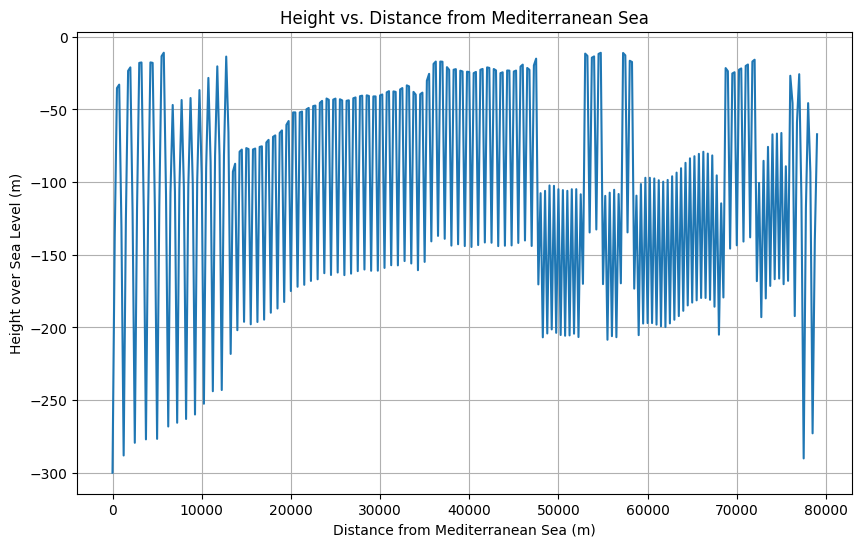

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import csv

x = [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
R = [300.0, 140.00000000000003, 40.00000000000001, 40.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 40.00000000000001, 40.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 40.00000000000001, 40.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 40.00000000000001, 40.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 40.00000000000001, 40.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 340.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 340.0000000000001, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 340.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 340.0000000000001, 180.0, 180.0, 300.0, 180.0, 180.0, 340.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 340.0000000000001, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 300.0, 180.0, 180.0, 340.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 380.0000000000001, 280.00000000000006, 340.0000000000001, 180.0, 180.0, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 80.00000000000001, 140.00000000000003, 300.0, 140.00000000000003, 40.00000000000001]

def calculate_distance(lat1, lon1, lat2, lon2):
    """Calculates the great-circle distance between two points on the Earth (specified in decimal degrees)."""
    R = 6371000  # Radius of the Earth in meters
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

def interpolate_height(filename, distance_interval=250, output_filename="interpolated_data.csv"):
    """Reads data, calculates distances, interpolates height, plots, and saves to CSV."""

    data = np.loadtxt(filename)
    latitudes = data[:, 0]
    longitudes = data[:, 1]
    heights = data[:, 2]

    distances = [0]
    total_distance = 0

    for i in range(1, len(latitudes)):
        dist = calculate_distance(latitudes[i - 1], longitudes[i - 1], latitudes[i], longitudes[i])
        total_distance += dist
        distances.append(total_distance)

    distances = np.array(distances)

    f = interp1d(distances, heights, kind='linear')
    max_distance = distances[-1]
    interpolated_distances = np.arange(0, max_distance, distance_interval)
    interpolated_heights = f(interpolated_distances) - R

    # Save to CSV
    with open(output_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Distance (m)", "Height (m)"])  # Header row
        for dist, height in zip(interpolated_distances, interpolated_heights):
            writer.writerow([dist, height])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(interpolated_distances, interpolated_heights)
    plt.xlabel("Distance from Mediterranean Sea (m)")
    plt.ylabel("Height over Sea Level (m)")
    plt.title("Height vs. Distance from Mediterranean Sea")
    plt.grid(True)
    plt.show()

interpolate_height("channel_data.txt", output_filename="interpolated_height.csv")

In [9]:
print(sum([1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0,]))

136.0
